useful webpage:
    https://www.kaggle.com/gabriellima/house-sales-in-king-county-usa/comments
        

***
plan:
- view the data
- look for na values.  
    - isna
    - values that substitute for na, e.g. -99.99 or another impossible value
- look for duplicates
    - duplicates = df[df.duplicated(subset='id')]
- decide on columns that are not of any value to us
- possibly create new columns
    - e.g. total sqft column of living and lot
- correlation:
    - heat map
    - matrix


extra
- do sqft_living columns equal sqft_above + sqft_basement?
- is there a way to plot the yr_built to see if 1900 is a null value or not?
- we have lat and long, do we want to do a heat map for higher prices?

# Table of Contents:

- [Importing Libraries and Data](#Importing)


- [Data Exploration:](#Exploration)
note: includes: * info, describe, shape, check for NaN or extraenuous results, check for duplicates *** normal distribution 
    - [Checking Normal Distribution of Data](#distribution-check)
    - [Summary of Findings](#exploration-summary)
    
    
- [Data Cleaning:](#Cleaning)
    - [Coverting Datatypes:](#Converting-Datatypes)
        - [Date to Datetime Format](#convert_datetime)
    - [Dealing With Missing and Extraneous Values:](#Missing) 
       - ['yr_renovated'](#cleaning_yr_renovated)
       - ['sqft_basement'](#cleaning_sqft_basement)
    - [Dummy Coding Categorical Variables:](#Dummy-Coding)
        - ['Zip Code'](#Dummy-Zip)
        - ['Waterfront'](#dummy_waterfront)


- [Model Decisions:](#model-decisions) 
    - [Correlation Matrices](#corr-matrices) note: to identify strong predictors and independence of IVs
    - [Checking for Linear Assumptions:](#linear-assumption) 
    - [Dropping Data for Model:](#dropped-vars-model-1) note: dropped data might include: view, ID, zipcode 


- [Training and Testing Our MultiLinear Regressiona Model:](#train-test-mlr)
    - [Model 1](#model-1)
    - [Model 2](#model-2) note: include justification on decisions made for changes in variables tested, adjusted r^2, k-fold cross validation


- [Conclusions and Discussion:](#conclusion)
    - [Summary of Findings](#conclusion-summary) 
    - [Assumptions](#assumptions) 
    - [Limitations](#limitations)


<a id="Importing"></a>
# Importing Libraries and Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')


<a id="Exploration"></a>
# Data Exploration:

In [2]:
df.head().T
#transposed so we can see each column heading with example values.

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [3]:
df.shape

(21597, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


<a id="exploration-summary"></a>
## Summary of Exploratory Findings:

Columns which are not obvious in meaning:
- date = house was sold
- price = "is prediction target" (does this mean its what kingsdata predicts? or something else?)
- waterfront = if the property has a view to the waterfront
- view = "has been viewed" (scale of 0-4, predominately 0)
- condition = overall state of condition (1-5)
- grade = king's grading system (only 3-13 shown, might be on a larger range)
- sqft_living15/lot15 = sqft of living/lot area of 15 closest neighbors

<a id="Cleaning"></a>
# Data Cleaning:

In [7]:
#creating a new dataframe for cleaned variables 
df_cleaned = df

## Checking for Duplicates:

In [8]:
df.shape

(21597, 21)

In [9]:
df.nunique().sort_values(ascending=False)
#Since there are fewer unique IDs than the length of our database, we can assume that there are duplicates

id               21420
sqft_lot          9776
sqft_lot15        8682
lat               5033
price             3622
sqft_living       1034
sqft_above         942
sqft_living15      777
long               751
date               372
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           29
bedrooms            12
grade               11
floors               6
condition            5
view                 5
waterfront           2
dtype: int64

In [10]:
df[df.duplicated()]
#It appears that there are no rows that are exactly the same

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
df[df['id'].duplicated()].shape
#when we check for duplicates with the ID column.  we have 177 rows with duplicated IDs.  this matches up with 21597-21420=177
#e.g. rows 93 and 94 show that in 5 months house value went up 270,000.  but all other values are the same.
#suggests there was either bad data collection OR a quick rennovation and bump up the selling price.  

#possible solutions: take 1st value, take latest value, take the mean, or keep all data.

# dates from 2014-2015 and only 177 have managed to be sold twice in that time window

#1st value could be undervalued, e.g. foreclosure market
#2nd value could be overvalued, wont be reflected in variables, e.g. now has solar panels
#best idea is to leave them both

(177, 21)

In [12]:
df[df['id'].duplicated(keep = False)].head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


<a id="Converting-Datatypes"></a>
## Converting Datatypes:

<a id="datetime"></a>
### Converting 'date' to datetime format:

In [13]:
#converted the 'date' column from object to datetime format
pd.to_datetime(df_cleaned['date'], format="%m/%d/%Y").head(3)


0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: date, dtype: datetime64[ns]

<a id="Missing"></a>
## Checking for Missing and Extraneous Values:

In [14]:
df.isna().sum().sum()
#Check first if there is any na values.  we find that there's 6281 na values

6281

In [15]:
df.isna().sum().sort_values(ascending=False)
#We can see from this that the columns for yr_renovated and waterfront have a lot of na values.  view only has some

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [16]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [17]:
# replaced the NaN values in 'waterfront' with the value 2.
df_cleaned['waterfront'] = df_cleaned['waterfront'].replace(np.nan,2)

<a id="cleaning_yr_renovated"></a>
### Examining Missing Data in 'yr_renovated':

In [18]:
df['yr_renovated'].value_counts().head()
#We can see from this that almost 96% of values in this column are '0'.  This column therefore doesn't offer much value
#This is in addition to the NA values shown before
#We can assume its bad data as when we look at duplicates and "quick rennovation" idea, the yr_renovated column is often == 0


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

<a id="cleaning_sqft_basement"></a>
### Replacing Nan and Extraneous Values in 'sqft_basement':

In [19]:
#change ? strings to NaNs in sqft_basement column
df['sqft_basement'].sort_values(ascending=False).head(2)
#can see that there are ? values

19234    ?
6410     ?
Name: sqft_basement, dtype: object

In [20]:
#replacing ? values with nan
df_cleaned['sqft_basement'] = df_cleaned['sqft_basement'].replace('?', np.nan)

In [21]:
df_cleaned['sqft_basement'].isna().value_counts()

False    21143
True       454
Name: sqft_basement, dtype: int64

In [22]:
#creating a dataframe without any null values for sqft basement in order to determine wheter to impute mean/median
#for missing values
df_sqft_no_nan = df_cleaned[~(df_cleaned['sqft_basement'].isna())]

In [23]:
#can see that nan values have been dropped from this dataframe
df_sqft_no_nan

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,2.0,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [25]:
#convert whole column to int64 format
#df_cleaned = df_cleaned['sqft_basement'].astype(float).astype(int)
df_sqft_no_nan = df_sqft_no_nan['sqft_basement'].astype(float).astype(int)

KeyError: 'sqft_basement'

In [33]:
type(df_sqft_no_nan['sqft_basement'])

KeyError: 'sqft_basement'

In [32]:
sns.distplot(df_sqft_no_nan['sqft_basement'], bins=20)

KeyError: 'sqft_basement'

In [9]:
#df_cleaned.loc[df_cleaned['sqft_basement'] == 'sqft_basement']

NameError: name 'df_cleaned' is not defined

In [25]:
#df_cleaned['sqft_basement'] = df_cleaned['sqft_basement'].apply(lambda x: )

SyntaxError: invalid syntax (<ipython-input-25-c0d6099d0e06>, line 1)

In [26]:
#(df_cleaned['sqft_basement'].isna())

0        False
1        False
2        False
3        False
4        False
5        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
         ...  
21566    False
21567    False
21568    False
21569    False
21570    False
21571    False
21572    False
21573    False
21574    False
21575    False
21576    False
21577    False
21578    False
21579    False
21580    False
21582    False
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589    False
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
Name: sqft_basement, Length: 21143, dtype: bool

In [203]:
# df_cleaned[([df_cleaned['sqft_basement']] != '?') | (df_cleaned['sqft_basement'].isna())]

In [30]:
#create a new variable/column without the na or ? values.  then take the mean/median.  
#use the mean/median depending on a plot, to see distribution of data
# substitute in the values of na or ? accordingly.

# sqft_basement_known_values = df_cleaned['sqft_basement'] != '?' or np.nan

#sqft_basement_known_values = [(df_cleaned[df_cleaned['sqft_basement']] != '?') & (df_cleaned[df_cleaned['sqft_basement']] != np.nan)]

# np.isnan('NaN')

# sqft_basement_mean = np.mean(df_cleaned['sqft_basement'])
# df_cleaned['sqft_basement'] = df['sqft_basement'].replace('?', sqft_basement_mean)

# df['column name'].fillna(0, inplace = True)
#to replace nas with another value

KeyError: "None of [Index(['0.0', '400.0', '0.0', '910.0', '0.0', '1530.0', '?', '0.0', '730.0',\n       '0.0',\n       ...\n       '0.0', '0.0', '0.0', '910.0', '130.0', '0.0', '0.0', '0.0', '0.0',\n       '0.0'],\n      dtype='object', length=21597)] are in the [columns]"

In [144]:
#Check that the ? values have gone
df_cleaned['sqft_basement'].sort_values(ascending=False).head(2)

19234    ?
6410     ?
Name: sqft_basement, dtype: object

<a id="Dummy-Coding"></a>
## Dummy-Coding Categorical Variables:

<a id="Dummy-Zip"></a>
### Dummy-Coding 'zipcode':

In [39]:
df_cleaned['zipcode'].value_counts().shape
#i.e. there are 70 different zipcodes
#can create 70 dummy coded variables to see if there is a particular zipcode that distorts the price (e.g. beverly hills 90210)
#otherwise zipcode isn't sequential so may not be useful.

(70,)

In [40]:
df_dummies_zipcode = pd.get_dummies(df_cleaned['zipcode'])
df_dummies_zipcode.head(3)



,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Not using this code as the cell below seems to be better (concat)
# combined_df = pd.merge(heroes_df, powers_df, how = 'inner', left_index = True, right_index = True)

# df_cleaned_dummies = pd.merge(df_cleaned, df_dummies_zipcode, how='outer', left_index=True, right_index=True)
# df_cleaned_dummies.head(2)

In [42]:
df_cleaned_dummies = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['zipcode'])], axis=1);
df_cleaned_dummies.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<a id="dummy_waterfront"></a>
### Dummy-Coding 'Waterfront':

In [43]:
#1st one makes 1 big DF
waterfront_columns = pd.DataFrame({'waterfront': ['no','yes','unknown']})
df_cleaned_dummies = pd.concat([df_cleaned_dummies, pd.get_dummies(df_cleaned['waterfront'], columns=waterfront_columns)], axis=1)
#2nd one makes DF for each dummy
# df_cleaned_dummies_waterfront = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['waterfront'])], axis=1);
df_cleaned_dummies.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98166,98168,98177,98178,98188,98198,98199,0.0,1.0,2.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
#creating custom column headings for dummy-coded waterfront variable
df_cleaned_dummies = df_cleaned_dummies.rename({0.0:'waterfront_no', 1.0:'waterfront_yes', 2.0:'waterfront_unk'}, axis=1)

In [45]:
df_cleaned_dummies.reset_index(drop=True, inplace=True)

In [46]:
df_cleaned_dummies.drop('index', inplace=True, axis=1)

KeyError: "['index'] not found in axis"

In [47]:
df_cleaned_dummies[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98166,98168,98177,98178,98188,98198,98199,waterfront_no,waterfront_yes,waterfront_unk
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


# Model Selection: 

## Dropping Data:

In [157]:
#possible steps:
# drop the duplicated data??
# what does view give us?  i think nothing

### Dropping zipcode: 

In [163]:
#see previous comments in categorizing zipcode; decision to use sq_ft_!5 instead
#scatter to see if there's extremes of zipcode vs price
#get the mean price of each property in each zipcode category and plot mean price vs zipcode

#df_cleaned= df.drop(columns = 'yr_renovated')
#df_cleaned.head() 

SyntaxError: invalid syntax (<ipython-input-163-1695ecf08b07>, line 3)

### Dropping yr_renovated

In [158]:
df_cleaned = df.drop(columns = 'yr_renovated')
df_cleaned.head()
# 3842 values were NaN, 17011 were valued at 0.  3842+17011=20853     20853/21597=96.6% of data is not useful.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Dropping 'waterfront'

### Dropping 'view'

# CHECK/FINISH THIS 

In [159]:
#Does this column provide us with anything?  it is assumed to be the number of views since the last sale
#63 were Nan values. 

#

# solutions for Nan values:
# give the median or views.  
# df_cleaned['view'].replace(,np.median(df_cleaned['view']), inplace=False)
# df_cleaned['view'].fillna(np.median(df_cleaned['view']))

# heroes_df['Height'].replace(-99, np.median(heroes_df['Height']), inplace= True)
# drop the rows.  
# insert a value

type(df_cleaned['view'][7])

numpy.float64

In [160]:
df_cleaned['view'].isna()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21567    False
21568    False
21569    False
21570    False
21571    False
21572    False
21573    False
21574    False
21575    False
21576    False
21577    False
21578    False
21579    False
21580    False
21581    False
21582    False
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589     True
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
Name: view, Length: 21597, dtype: bool

### Removing 'id' column

In [161]:
# as we are keeping each row of duplicate IDs, the ID column is not very useful.  so we can omit from the model
df_cleaned.drop(columns='id', inplace=True)
df_cleaned.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


## Correlation Matrices:

### Identifying Top Predictors:

In [164]:
df.corr()[['price', 'bedrooms']]

,price,bedrooms
id,-0.016772,0.001150
price,1.000000,0.308787
bedrooms,0.308787,1.000000
bathrooms,0.525906,0.514508
sqft_living,0.701917,0.578212
sqft_lot,0.089876,0.032471
floors,0.256804,0.177944
waterfront,0.024092,-0.004685
view,0.395734,0.078523
condition,0.036056,0.026496


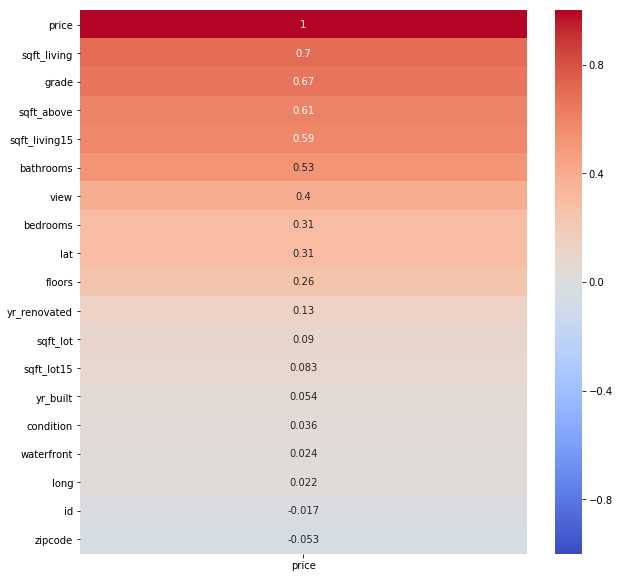

In [176]:
#Plot a heatmap to see where there is a strong correlation
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr()[['price']].sort_values(by=['price'],ascending=False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True)
#from the heatmap below we can see that there are no strong negative correlations, but there are several positive correlations:
#bathrooms, sqft_living, grade, sqft_above, sqft_living15

#other code I used was:
#df.corr()['price'].sort_values(ascending=False)


In [4]:
#attempting to look at correlation table between price and categorized zip zode
plt.figure(figsize = (10, 10))
sns.heatmap(df_cleaned_dummies.corr()[['price']].sort_values(by=['price'],ascending=False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True)

NameError: name 'df_cleaned_dummies' is not defined

<Figure size 720x720 with 0 Axes>

### Full Correlation Matrix/Checking for Independence of IVs:

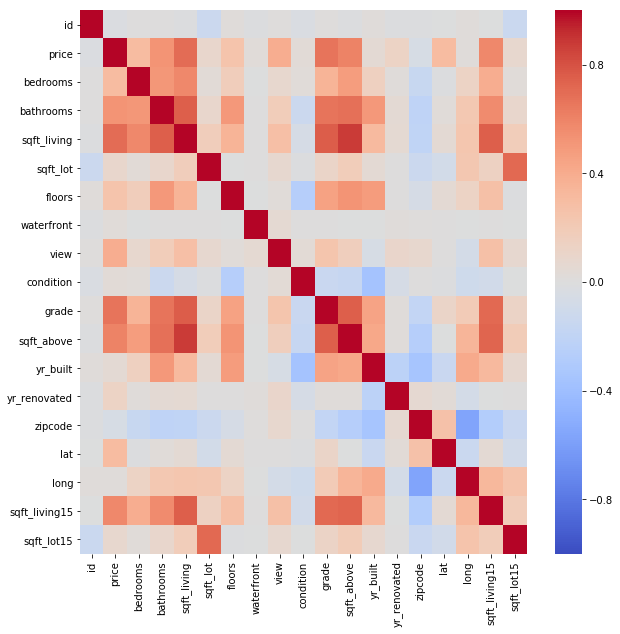

In [52]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_cleaned.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm');


## Checking for Linear Relationship Assumption

## Checking For Normal Distributions
